In [1]:
# вариант 28: u'' + tgx * u' + x * u = (1 + x) * cosx + x^2 * sinx  [0, 1]
# u(0) - u'(0) = 1, u(1) = 1.3818, u0(x) = x * sin(x) + cos(x)
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p(x):
  return np.tan(x)

def q(x):
  return x

def f(x):
  return (1 + x) * np.cos(x) + (x ** 2) * np.sin(x)

a1, b1, d1 = 1, -1, 1
a2, b2, d2 = 1, 0, 1.3818
a, b = 0, 1
h = 0.05

def analyticSolution(x):
  return  x * np.sin(x) + np.cos(x)


xRange = np.arange(a, b + h, h)
uAnalyticRange = analyticSolution(xRange)

**Метод прогонки 1-го порядка точности**

In [3]:
def thomasAlgorithm1(xRange, p, q, f):
    aRange = np.zeros(len(xRange))
    bRange = np.zeros(len(xRange))
    cRange = np.zeros(len(xRange))
    fRange = np.zeros(len(xRange))
    h = xRange[1] - xRange[0] 

    aRange[0] = 0
    bRange[0] = a1 - b1 / h
    cRange[0] = b1 / h
    fRange[0] = d1
    aRange[-1] = -b2 / h
    bRange[-1] = a2 + b2 / h
    cRange[-1] = 0
    fRange[-1] = d2

    for i in range(1, len(xRange) - 1):
        aRange[i] = 1 / (h ** 2) - p(xRange[i]) / (2 * h)
    for i in range(1, len(xRange) - 1):
        bRange[i] = -2 / (h ** 2) + q(xRange[i])
    for i in range(1, len(xRange) - 1):
        cRange[i] = 1 / (h ** 2) + p(xRange[i]) / (2 * h)
    for i in range(1, len(xRange) - 1):
        fRange[i] = f(xRange[i])

    A = np.zeros(len(aRange))
    B = np.zeros(len(aRange))

    A[0] = -cRange[0] / bRange[0]
    B[0] = fRange[0] / bRange[0]

    for i in range(1, len(aRange) - 1):
        A[i] = -cRange[i] / (bRange[i] + aRange[i] * A[i - 1])
    for i in range(1, len(aRange) - 1):
        B[i] = (fRange[i] - aRange[i] * B[i - 1]) / (bRange[i] + aRange[i] * A[i - 1])

    A[-1] = 0
    B[-1] = (fRange[-1] - aRange[-1] * B[-2]) / (bRange[-1] + aRange[-1] * A[-2])

    u = np.zeros(len(aRange))

    u[-1] = B[-1]
    for i in range(len(aRange) - 2, -1, -1):
        u[i] = B[i] + A[i] * u[i + 1]

    return u

**Метод прогонки 2-го порядка точности**

In [4]:
def thomasAlgorithm2(xRange, p, q, f):
    aRange = np.zeros(len(xRange))
    bRange = np.zeros(len(xRange))
    cRange = np.zeros(len(xRange))
    fRange = np.zeros(len(xRange))
    h = xRange[1] - xRange[0] 

    aRange[0] = 0
    bRange[0] = -2 + (2 * a1 * h / b1) - (p(xRange[0]) * a1 * (h ** 2) / b1) + q(xRange[0]) * (h ** 2)
    cRange[0] = 2
    fRange[0] = f(xRange[0]) * (h ** 2) + ((d1 * 2 * h) / b1) - (p(xRange[0]) * d1 * (h ** 2) / b1)
    aRange[-1] = 0
    # bRange[-1] = -2 - (2 * h * a2 / b2) - (p(xRange[-1]) * (h ** 2) * a2 / b2) + (q(xRange[-1]) * (h ** 2))
    bRange[-1] = a2
    cRange[-1] = 0
    # fRange[-1] = f(xRange[-1]) * (h ** 2) - ((h ** 2) * p(xRange[-1]) * d2 / b2) - (2 * h * d2 / b2)
    fRange[-1] = d2

    for i in range(1, len(xRange) - 1):
        aRange[i] = 1 / (h ** 2) - p(xRange[i]) / (2 * h)
    for i in range(1, len(xRange) - 1):
        bRange[i] = -2 / (h ** 2) + q(xRange[i])
    for i in range(1, len(xRange) - 1):
        cRange[i] = 1 / (h ** 2) + p(xRange[i]) / (2 * h)
    for i in range(1, len(xRange) - 1):
        fRange[i] = f(xRange[i])

    A = np.zeros(len(aRange))
    B = np.zeros(len(aRange))

    A[0] = -cRange[0] / bRange[0]
    B[0] = fRange[0] / bRange[0]

    for i in range(1, len(aRange) - 1):
        A[i] = -cRange[i] / (bRange[i] + aRange[i] * A[i - 1])
    for i in range(1, len(aRange) - 1):
        B[i] = (fRange[i] - aRange[i] * B[i - 1]) / (bRange[i] + aRange[i] * A[i - 1])

    A[-1] = 0
    B[-1] = (fRange[-1] - aRange[-1] * B[-2]) / (bRange[-1] + aRange[-1] * A[-2])

    u = np.zeros(len(aRange))
    
    u[-1] = B[-1]
    for i in range(len(aRange) - 2, -1, -1):
        u[i] = B[i] + A[i] * u[i + 1]

    return u

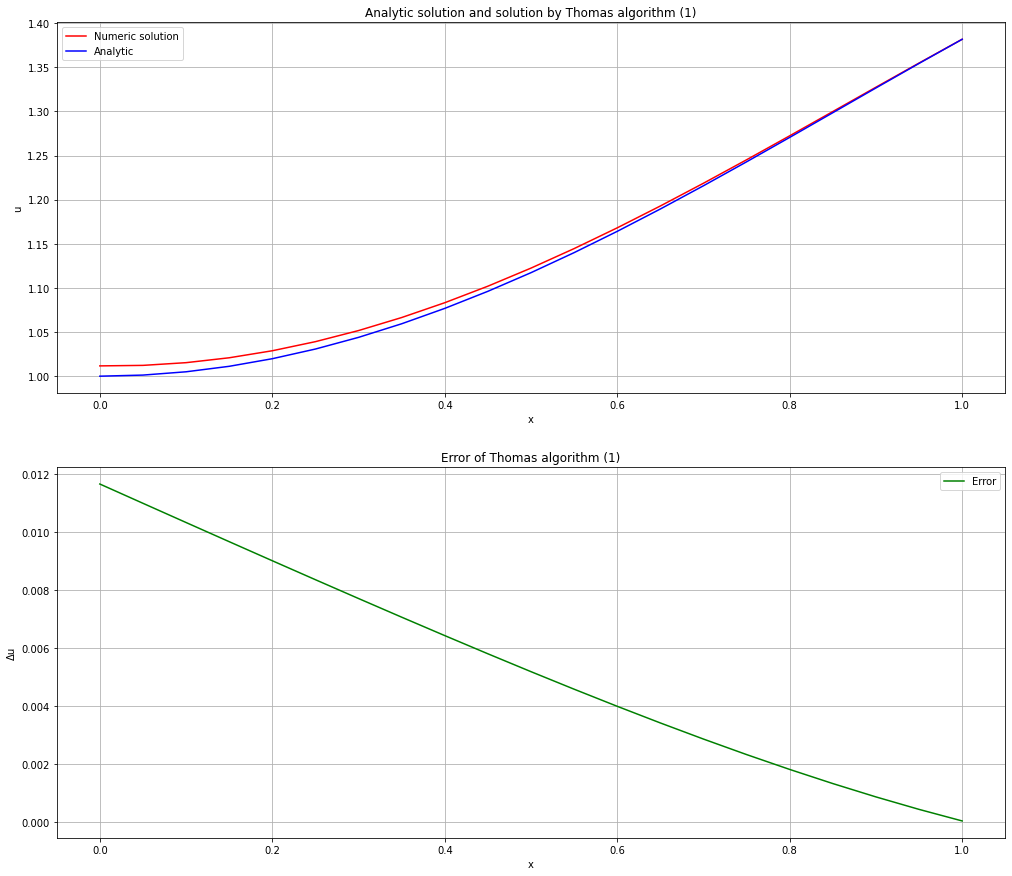

In [5]:
fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRange, thomasAlgorithm1(xRange, p, q, f), color='r', label='Numeric solution')
axs[0].set_title("Analytic solution and solution by Thomas algorithm (1)")
axs[0].plot(xRange, uAnalyticRange, color='b', label='Analytic')
axs[1].plot(xRange, [abs(thomasAlgorithm1(xRange, p, q, f)[i] - uAnalyticRange[i])  for i in range (len(xRange))], color = 'g', label = 'Error')
axs[1].set_title("Error of Thomas algorithm (1)")
axs[0].set_ylabel("u")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  ax.legend()
  ax.grid(True)
plt.show()

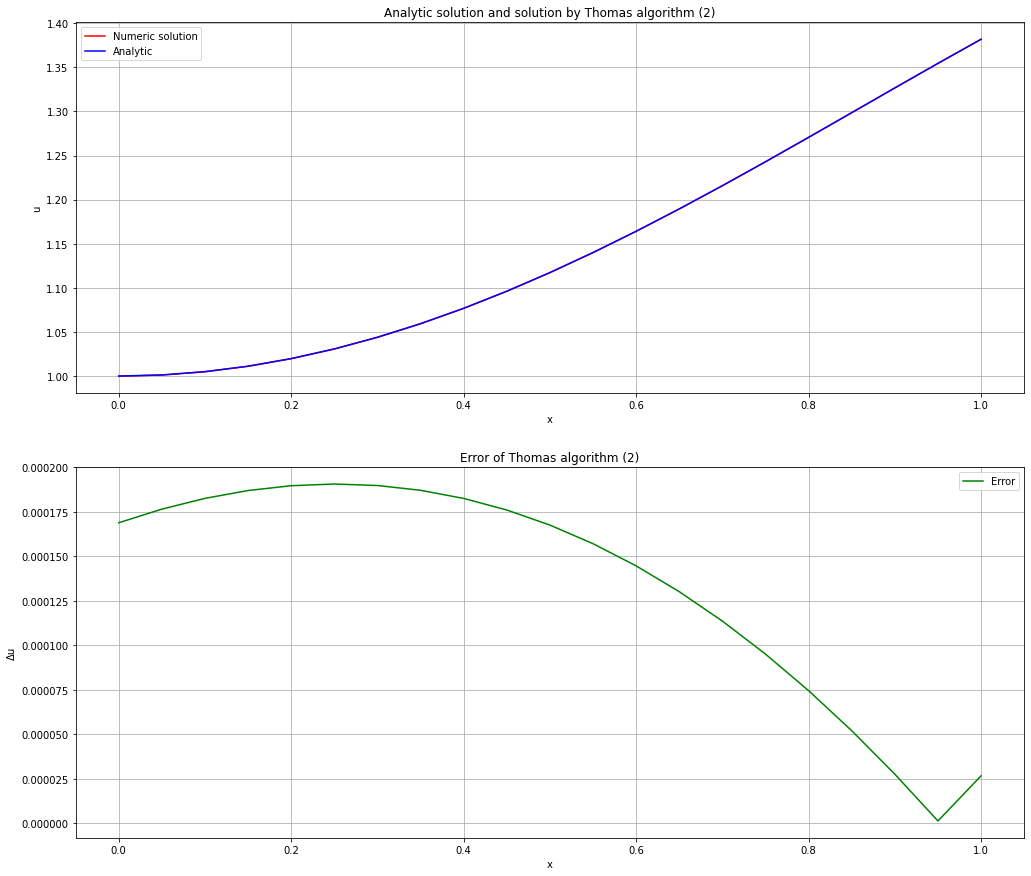

In [6]:
fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRange, thomasAlgorithm2(xRange, p, q, f), color='r', label='Numeric solution')
axs[0].set_title("Analytic solution and solution by Thomas algorithm (2)")
axs[0].plot(xRange, uAnalyticRange, color='b', label='Analytic')
axs[1].plot(xRange, [abs(thomasAlgorithm2(xRange, p, q, f)[i] - uAnalyticRange[i])  for i in range (len(xRange))], color = 'g', label = 'Error')
axs[1].set_title("Error of Thomas algorithm (2)")
axs[0].set_ylabel("u")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  ax.legend()
  ax.grid(True)
plt.show()